# Generate Pareto frontier plots

TODO: We could consider doing some preprocessing on the dataframes, so that if the next result is worse, we just keep the preceding result. 

## Imports

In [59]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

## Supporting functions for getting Pareto frontier for SimOpt

In [60]:
def is_dominated(row, others, better_high, better_low):
    """Check if 'row' is dominated by any row in 'others'.
    
    Parameters:
    - row: The row to check for dominance.
    - others: Other rows against which to check for dominance.
    - better_high: Columns where a higher value is better.
    - better_low: Columns where a lower value is better.
    """
    for _, other_row in others.iterrows():
        # Check conditions for 'better high' columns
        high_conditions = all(other_row[col] >= row[col] for col in better_high)
        high_strictly_better = any(other_row[col] > row[col] for col in better_high)
        
        # Check conditions for 'better low' columns
        low_conditions = all(other_row[col] <= row[col] for col in better_low)
        low_strictly_better = any(other_row[col] < row[col] for col in better_low)
        
        if (high_conditions or not better_high) and (low_conditions or not better_low) and (high_strictly_better or low_strictly_better):
            return True
    return False


def filter_pareto_dominated(df, better_high, better_low):
    """Filter out Pareto dominated rows from the DataFrame based on optimization objectives.
    
    Parameters:
    - df: The DataFrame to filter.
    - better_high: Columns where a higher value is better.
    - better_low: Columns where a lower value is better.
    """
    non_dominated_rows = []
    for index, row in df.iterrows():
        if not is_dominated(row, df.drop(index), better_high, better_low):
            non_dominated_rows.append(row)
    return pd.DataFrame(non_dominated_rows, columns=df.columns)

In [61]:
def filter_simopt_results(df, min_exact_match_pc):
    print("Total number of rows:", df.shape[0])
    df = df[df["exact_match_%_mean"] >= min_exact_match_pc]
    print("Number of rows after filtering for minimum exact match percentage:", df.shape[0])
    df = filter_pareto_dominated(df, ["service_level_%_mean"], ["wastage_%_mean"])
    print("Number of rows after filtering for Pareto dominance:", df.shape[0])
    df = df.sort_values(by=["service_level_%_mean", "wastage_%_mean"])
    return df

## Exact match 50%

### Load in source data

In [62]:
min_exact_match_pc = 50
#parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/single_agent_both/pareto_frontier_plots/outputs/2024-03-27/20-40-46")

parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/single_agent_both/pareto_frontier_plots/outputs/2024-03-30/19-22-53")

simopt_exact_match_df = pd.read_csv(parent_dir / "simopt_exact_match_df.csv")
simopt_priority_match_df = pd.read_csv(parent_dir / "simopt_priority_match_df.csv")
simopt_oldest_compatible_match_df = pd.read_csv(parent_dir / "simopt_oldest_compatible_match_df.csv")
service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")

In [63]:
simopt_exact_match_filtered = filter_simopt_results(simopt_exact_match_df, min_exact_match_pc)
simopt_priority_match_filtered = filter_simopt_results(simopt_priority_match_df, min_exact_match_pc)
simopt_oldest_compatible_match_filtered = filter_simopt_results(simopt_oldest_compatible_match_df, min_exact_match_pc)

Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 120
Number of rows after filtering for Pareto dominance: 23
Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 114
Number of rows after filtering for Pareto dominance: 22
Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 114
Number of rows after filtering for Pareto dominance: 18


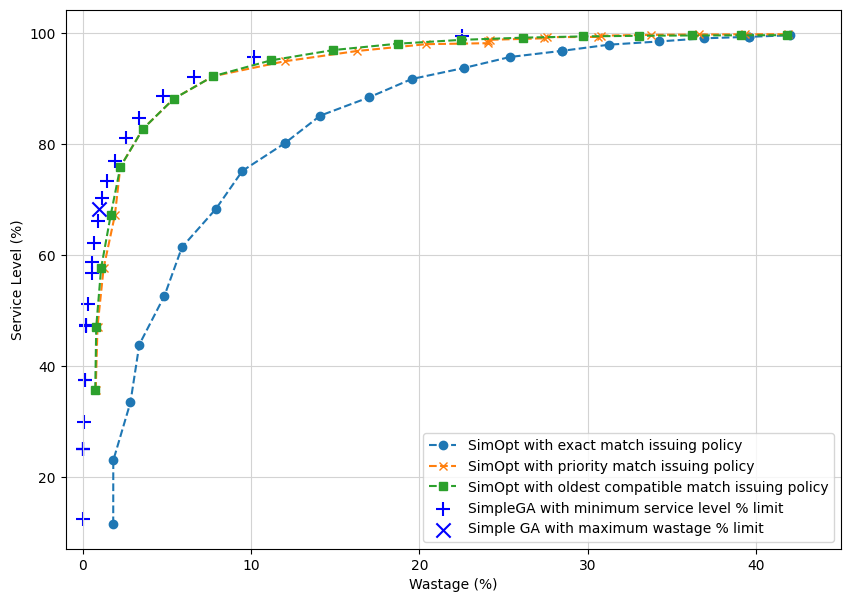

In [64]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(simopt_exact_match_filtered["wastage_%_mean"], simopt_exact_match_filtered["service_level_%_mean"], "o", linestyle="--", label="SimOpt with exact match issuing policy")
plt.plot(simopt_priority_match_filtered["wastage_%_mean"], simopt_priority_match_filtered["service_level_%_mean"], "x", linestyle="--", label="SimOpt with priority match issuing policy")
plt.plot(simopt_oldest_compatible_match_filtered["wastage_%_mean"], simopt_oldest_compatible_match_filtered["service_level_%_mean"], "s", linestyle="--", label="SimOpt with oldest compatible match issuing policy")
plt.scatter(service_level_limit_df["top_1_wastage_%_mean"], service_level_limit_df["top_1_service_level_%_mean"], label="SimpleGA with minimum service level % limit", marker="+", s=105, color='blue')
plt.scatter(wastage_limit_df["top_1_wastage_%_mean"], wastage_limit_df["top_1_service_level_%_mean"], label="Simple GA with maximum wastage % limit", marker="x", s=105, color='blue')
plt.grid(color="lightgrey")
ax.set_xlabel("Wastage (%)")
ax.set_ylabel("Service Level (%)")
ax.set_xlim(-1, 45)
ax.legend()

## Exact match 75%

In [65]:
min_exact_match_pc = 75
#parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/single_agent_both/pareto_frontier_plots/outputs/2024-03-28/17-56-00")
parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/single_agent_both/pareto_frontier_plots/outputs/2024-03-30/20-41-39")

simopt_exact_match_df = pd.read_csv(parent_dir / "simopt_exact_match_df.csv")
simopt_priority_match_df = pd.read_csv(parent_dir / "simopt_priority_match_df.csv")
simopt_oldest_compatible_match_df = pd.read_csv(parent_dir / "simopt_oldest_compatible_match_df.csv")
service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")

In [66]:
simopt_exact_match_filtered = filter_simopt_results(simopt_exact_match_df, min_exact_match_pc)
simopt_priority_match_filtered = filter_simopt_results(simopt_priority_match_df, min_exact_match_pc)
simopt_oldest_compatible_match_filtered = filter_simopt_results(simopt_oldest_compatible_match_df, min_exact_match_pc)

Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 120
Number of rows after filtering for Pareto dominance: 23
Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 97
Number of rows after filtering for Pareto dominance: 22
Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 96
Number of rows after filtering for Pareto dominance: 18


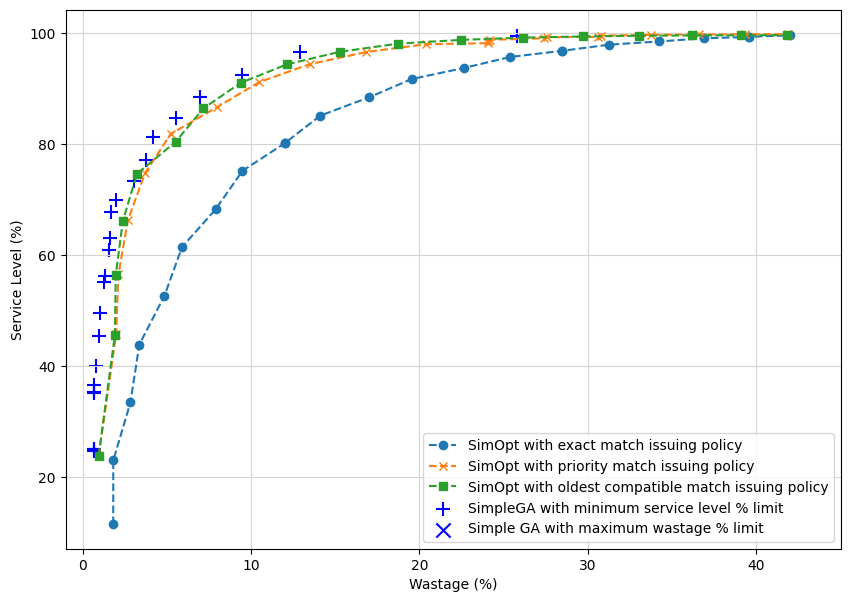

In [67]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(simopt_exact_match_filtered["wastage_%_mean"], simopt_exact_match_filtered["service_level_%_mean"], "o", linestyle="--", label="SimOpt with exact match issuing policy")
plt.plot(simopt_priority_match_filtered["wastage_%_mean"], simopt_priority_match_filtered["service_level_%_mean"], "x", linestyle="--", label="SimOpt with priority match issuing policy")
plt.plot(simopt_oldest_compatible_match_filtered["wastage_%_mean"], simopt_oldest_compatible_match_filtered["service_level_%_mean"], "s", linestyle="--", label="SimOpt with oldest compatible match issuing policy")
plt.scatter(service_level_limit_df["top_1_wastage_%_mean"], service_level_limit_df["top_1_service_level_%_mean"], label="SimpleGA with minimum service level % limit", marker="+", s=105, color='blue')
plt.scatter(wastage_limit_df["top_1_wastage_%_mean"], wastage_limit_df["top_1_service_level_%_mean"], label="Simple GA with maximum wastage % limit", marker="x", s=105, color='blue')
plt.grid(color="lightgrey")
ax.set_xlabel("Wastage (%)")
ax.set_ylabel("Service Level (%)")
ax.set_xlim(-1, 45)
ax.legend()

## Eaxct match 95%

In [74]:
min_exact_match_pc = 95
parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/single_agent_both/pareto_frontier_plots/outputs/2024-03-31/10-01-48")
#parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/single_agent_both/pareto_frontier_plots/outputs/2024-03-30/12-57-59")

simopt_exact_match_df = pd.read_csv(parent_dir / "simopt_exact_match_df.csv")
simopt_priority_match_df = pd.read_csv(parent_dir / "simopt_priority_match_df.csv")
simopt_oldest_compatible_match_df = pd.read_csv(parent_dir / "simopt_oldest_compatible_match_df.csv")
service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")

In [75]:
simopt_exact_match_filtered = filter_simopt_results(simopt_exact_match_df, min_exact_match_pc)
simopt_priority_match_filtered = filter_simopt_results(simopt_priority_match_df, min_exact_match_pc)
simopt_oldest_compatible_match_filtered = filter_simopt_results(simopt_oldest_compatible_match_df, min_exact_match_pc)

Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 120
Number of rows after filtering for Pareto dominance: 23
Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 67
Number of rows after filtering for Pareto dominance: 18
Total number of rows: 121
Number of rows after filtering for minimum exact match percentage: 31
Number of rows after filtering for Pareto dominance: 10


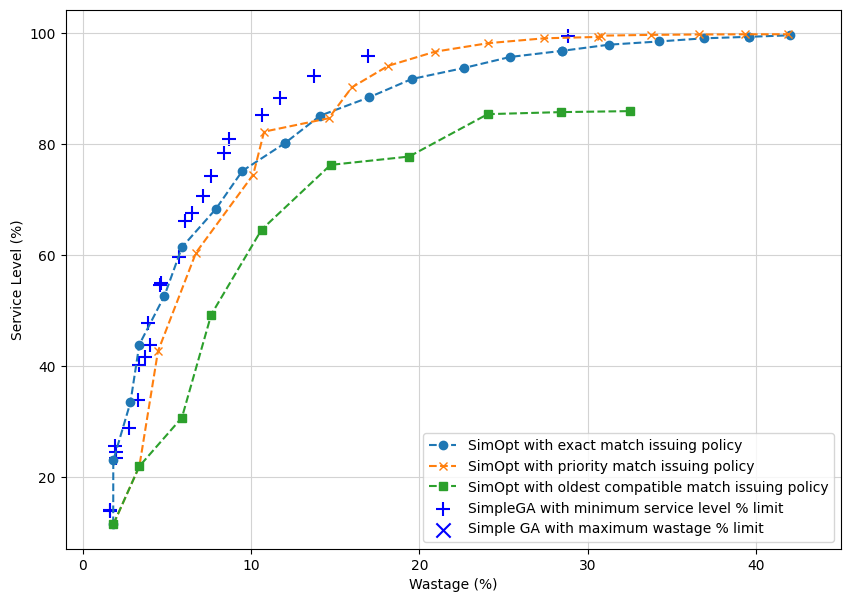

In [76]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(simopt_exact_match_filtered["wastage_%_mean"], simopt_exact_match_filtered["service_level_%_mean"], "o", linestyle="--", label="SimOpt with exact match issuing policy")
plt.plot(simopt_priority_match_filtered["wastage_%_mean"], simopt_priority_match_filtered["service_level_%_mean"], "x", linestyle="--", label="SimOpt with priority match issuing policy")
plt.plot(simopt_oldest_compatible_match_filtered["wastage_%_mean"], simopt_oldest_compatible_match_filtered["service_level_%_mean"], "s", linestyle="--", label="SimOpt with oldest compatible match issuing policy")
plt.scatter(service_level_limit_df["top_1_wastage_%_mean"], service_level_limit_df["top_1_service_level_%_mean"], label="SimpleGA with minimum service level % limit", marker="+", s=105, color='blue')
plt.scatter(wastage_limit_df["top_1_wastage_%_mean"], wastage_limit_df["top_1_service_level_%_mean"], label="Simple GA with maximum wastage % limit", marker="x", s=105, color='blue')
plt.grid(color="lightgrey")
ax.set_xlabel("Wastage (%)")
ax.set_ylabel("Service Level (%)")
ax.set_xlim(-1, 45)
ax.legend()